In [1]:
import pandas as pd

In [41]:
import numpy as np

In [2]:
pwd

'C:\\Users\\manoj\\Desktop'

In [12]:
df=pd.read_csv('C:\\Users\\manoj\\Desktop\\Kaggle\\titanic_kaggle\\train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [16]:
df.shape

(891, 10)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
X,y=df.iloc[:,1:].copy(),df.iloc[:,0].copy()

In [20]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [25]:
X.drop('Cabin',axis=1,inplace=True)

In [43]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [31]:
X.isna().sum()/891

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [32]:
X.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <a list of 5 Patch objects>)

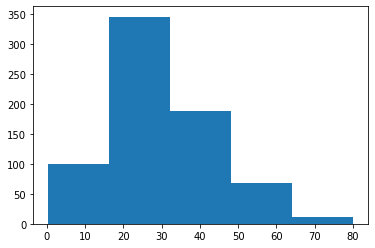

In [37]:
plt.hist(X['Age'],bins=5)

In [42]:
np.median(X['Age'].dropna().values)

28.0

In [45]:
X['Age']=X[['Age']].replace(np.nan,28)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [47]:
X.drop('Ticket',axis=1,inplace=True)

In [48]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [58]:
from sklearn.preprocessing import LabelEncoder

gen_enc=LabelEncoder()

gen_enc.fit(X['Sex'])

#list(zip(X['Sex'],gen_enc.transform(X['Sex'])))

X['Sex']=gen_enc.transform(X['Sex'])

In [59]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S


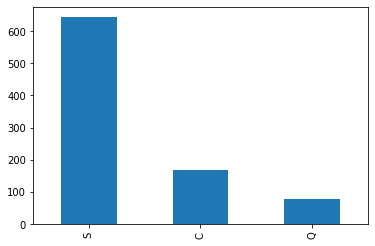

In [63]:
X['Embarked'].value_counts().plot(kind='bar')

In [65]:
X['Embarked']=X[['Embarked']].replace(np.nan,'S')

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB


In [71]:
X_emb=pd.get_dummies(X['Embarked'],drop_first=True)

In [81]:
X_emb.columns

Index(['Q', 'S'], dtype='object')

In [83]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [84]:
X=pd.DataFrame(np.c_[X.values,X_emb.values],columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Q','S'])

In [86]:
X.drop('Embarked',axis=1,inplace=True)

In [88]:
X['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

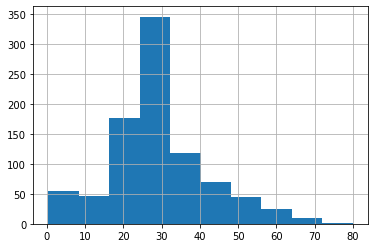

In [114]:
X['Age'].hist(bins=10)

In [116]:
np.quantile(X['Age'],[0,0.25,0.50,0.75,1])

array([0.42, 22.0, 28.0, 35.0, 80.0], dtype=object)

In [146]:
X['Age_group']=pd.cut(X['Age'],bins=np.quantile(X['Age'],[0,0.25,0.50,0.75,1]),labels=['age_a','age_b','age_c','age_d'],include_lowest=True)

In [147]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass       891 non-null object
Sex          891 non-null object
Age          891 non-null object
SibSp        891 non-null object
Parch        891 non-null object
Fare         891 non-null object
Q            891 non-null object
S            891 non-null object
Age_group    891 non-null category
dtypes: category(1), object(8)
memory usage: 56.9+ KB


In [148]:
X['Age_group']=X['Age_group'].astype(str)

In [149]:
X['Age_group'].value_counts()

age_b    308
age_a    231
age_d    217
age_c    135
Name: Age_group, dtype: int64

In [153]:
X_age_groups=pd.get_dummies(X['Age_group'],drop_first=True)

In [155]:
X_age_groups.columns

Index(['age_b', 'age_c', 'age_d'], dtype='object')

In [156]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'Age_group'],
      dtype='object')

In [159]:
X=pd.DataFrame(np.c_[X,X_age_groups],columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S','Age_group','age_b', 'age_c', 'age_d'])

In [160]:
X.drop('Age_group',axis=1,inplace=True)

In [162]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'age_b',
       'age_c', 'age_d'],
      dtype='object')

In [163]:
X.columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emb_Q', 'Emb_S', 'age_b','age_c', 'age_d']

In [165]:
X.drop('Age',axis=1,inplace=True)

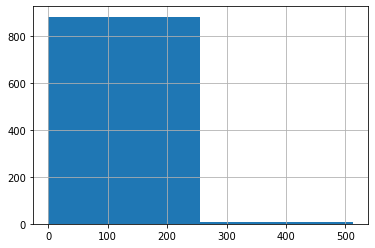

In [168]:
X['Fare'].hist(bins=2)

In [169]:
X

,Pclass,Sex,SibSp,Parch,Fare,Emb_Q,Emb_S,age_b,age_c,age_d
0,3,1,1,0,7.25,0,1,0,0,0
1,1,0,1,0,71.2833,0,0,0,0,1
2,3,0,0,0,7.925,0,1,1,0,0
3,1,0,1,0,53.1,0,1,0,1,0
4,3,1,0,0,8.05,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13,0,1,1,0,0
887,1,0,0,0,30,0,1,0,0,0
888,3,0,1,2,23.45,0,1,1,0,0
889,1,1,0,0,30,0,0,1,0,0


In [173]:
X.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Emb_Q', 'Emb_S', 'age_b',
       'age_c', 'age_d'],
      dtype='object')

In [175]:
df=pd.DataFrame(np.c_[X,y],columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Emb_Q', 'Emb_S', 'age_b','age_c', 'age_d','Survived'])

In [176]:
df.to_csv('TitanicForDSSession.csv')

In [177]:
pwd

'C:\\Users\\manoj\\Desktop'